In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp           
from scipy import stats

In [23]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [28]:
data = pd.read_csv("AAPL.csv", parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,30.447144,30.478571,30.080000,30.104286,20.159719,88102700
1,2010-01-04,30.490000,30.642857,30.340000,30.572857,20.473503,123432400
2,2010-01-05,30.657143,30.798571,30.464285,30.625713,20.508902,150476200
3,2010-01-06,30.625713,30.747143,30.107143,30.138571,20.182680,138040000
4,2010-01-07,30.250000,30.285715,29.864286,30.082857,20.145369,119282800


In [30]:
data = data.sort_values(by='Date')
data.set_index('Date',inplace=True)

Populating the interactive namespace from numpy and matplotlib


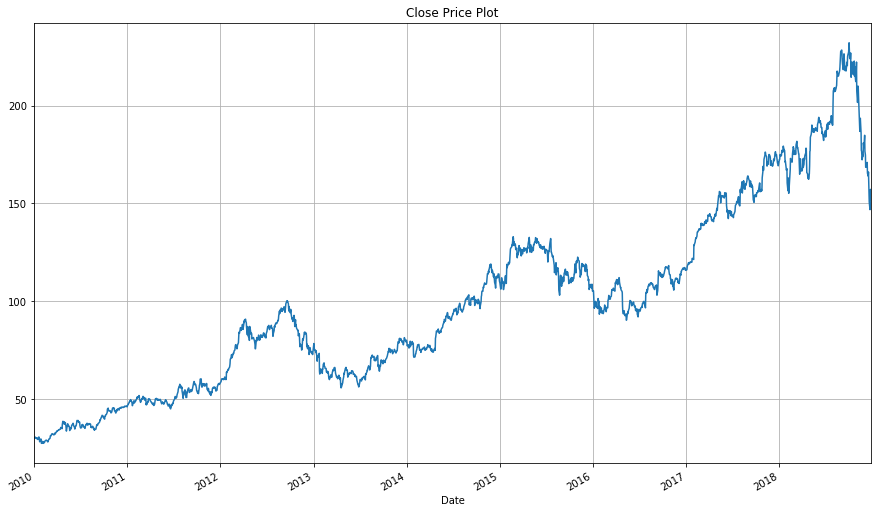

In [32]:
# Close price plot

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
data.Close.plot(grid = True, title = 'Close Price Plot')
plt.show()

In [33]:
# 종가에 대한 기초통계량
data.Close.describe()

count    2264.000000
mean       99.390734
std        46.783957
min        27.435715
25%        61.468929
50%        94.480003
75%       125.817503
max       232.070007
Name: Close, dtype: float64

In [34]:
close = data.Close
close.diff()

Date
2009-12-31          NaN
2010-01-04     0.468571
2010-01-05     0.052856
2010-01-06    -0.487142
2010-01-07    -0.055714
2010-01-08     0.200001
2010-01-11    -0.267143
2010-01-12    -0.341429
2010-01-13     0.418571
2010-01-14    -0.174286
2010-01-15    -0.500000
2010-01-19     1.301428
2010-01-20    -0.472856
2010-01-21    -0.522858
2010-01-22    -1.474285
2010-01-25     0.760000
2010-01-26     0.410000
2010-01-27     0.277144
2010-01-28    -1.227145
2010-01-29    -1.032856
2010-02-01     0.381428
2010-02-02     0.161429
2010-02-03     0.481428
2010-02-04    -1.025713
2010-02-05     0.487142
2010-02-08    -0.191429
2010-02-09     0.295715
2010-02-10    -0.152856
2010-02-11     0.507141
2010-02-12     0.244285
                ...    
2018-11-14    -5.429993
2018-11-15     4.610001
2018-11-16     2.119995
2018-11-19    -7.669998
2018-11-20    -8.880005
2018-11-21    -0.199997
2018-11-23    -4.490006
2018-11-26     2.330002
2018-11-27    -0.379990
2018-11-28     6.699997
2018-11-29 

In [35]:
# 일별 수익률

log_returns = np.log(data.Close).diff()
log_returns.describe()

count    2263.000000
mean        0.000728
std         0.016212
min        -0.131885
25%        -0.007056
50%         0.000676
75%         0.009584
max         0.085022
Name: Close, dtype: float64

In [36]:
# 새로운 obj에 parameter methods 저장

mu = log_returns.mean()
sigma = log_returns.std()
mu, sigma

(0.0007276454711338528, 0.016212433100095347)

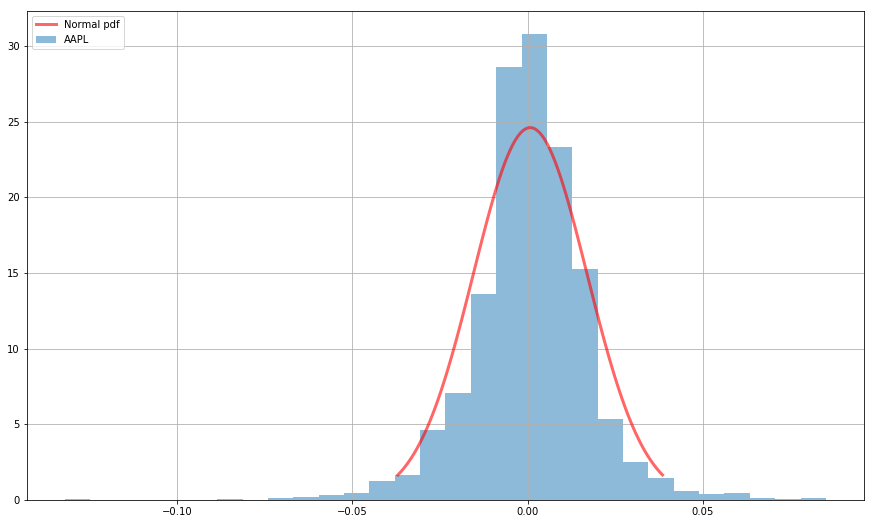

In [37]:
rv = stats.norm(loc= mu, scale= sigma) #애플주식과 같은 mean,std가진 정규분포 생성
r = stats.norm.rvs(loc= mu, scale= sigma,size=3000)  #위의 통계 분포 함수로 확률 변수 생성
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)  #확률밀도 그래프를 위한 100개 점

fig, ax = plt.subplots(1, 1)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x), 'r-', lw=3, alpha=0.6, label='Normal pdf')
log_returns.hist(bins = 30, label="AAPL", histtype = 'barstacked',
                 normed = True, alpha = 0.5)
plt.legend(loc='upper left')
plt.show()